## GRUPOS DIFERENTES

Modelo 2

Reporte de clasificación para la primera clasificación (conjunto filtrado de 0, 4 y 5):
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           4       1.00      0.75      0.86         4
           5       1.00      0.60      0.75         5

    accuracy                           0.85        20
   macro avg       0.93      0.78      0.83        20
weighted avg       0.88      0.85      0.84        20



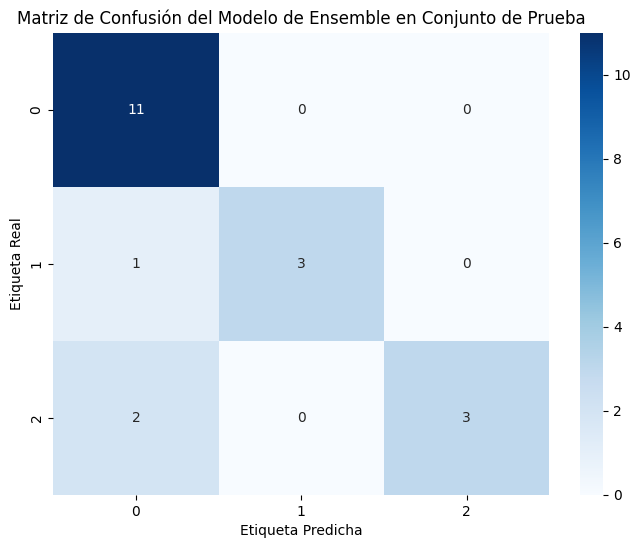

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

# Filtrar solo los datos con clases 0, 4, y 5
df_filtered = df[df['administracion'].isin([0, 4, 5])]

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df_filtered['textos']  # Frases
y = df_filtered['administracion']  # Clases originales

# Dividir los datos en conjuntos de entrenamiento y prueba para la primera clasificación
random = 81418
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X, y, test_size=0.25, random_state=random)

# Vectorización de texto usando TF-IDF
vectorizer2 = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer2.fit_transform(X_train_main)
X_test_tfidf = vectorizer2.transform(X_test_main)

# Crear el modelo de ensemble
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=10, random_state=random)
rf = RandomForestClassifier(n_estimators=100, random_state=random)
et = ExtraTreesClassifier(n_estimators=100, random_state=random)

segundo_ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('et', et),
    ],
    voting='soft'
)

# Entrenar el modelo en el conjunto filtrado de entrenamiento
segundo_ensemble_model.fit(X_train_tfidf, y_train_main)

# Predicciones y evaluación del primer modelo
y_pred_main = segundo_ensemble_model.predict(X_test_tfidf)
print("Reporte de clasificación para la primera clasificación (conjunto filtrado de 0, 4 y 5):")
print(classification_report(y_test_main, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test_main, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(3)], yticklabels=[str(i) for i in range(3)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

Modelo 1 

C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metric

Reporte de clasificación para la primera clasificación:
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.69      0.75      0.72        12
           2       0.67      0.55      0.60        11
           3       0.00      0.00      0.00         4

    accuracy                           0.65        46
   macro avg       0.50      0.52      0.50        46
weighted avg       0.60      0.65      0.62        46



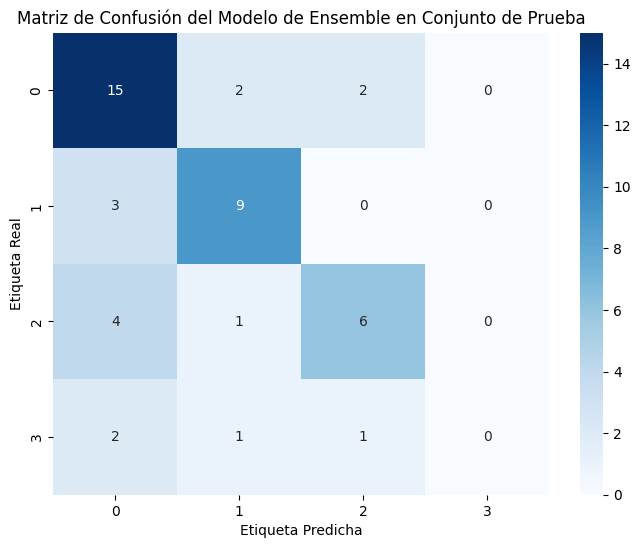

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Cargar datos
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df['textos']  # Frases
y = df['administracion']  # Clases originales

# Convertir clases 4 y 5 a 'no linea'
y_main = y.replace({4: 0, 5: 0})  # Cambiar las clases 4 y 5 a 0 ('no linea')

# Dividir los datos en conjuntos de entrenamiento y prueba para la primera clasificación
random = 81418
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X, y_main, test_size=0.25, random_state=random, stratify=y_main)

# Vectorización de texto usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features según sea necesario
X_train_tfidf = vectorizer.fit_transform(X_train_main)
X_test_tfidf = vectorizer.transform(X_test_main)

# Crear los clasificadores
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=10, random_state=81418)
rf = RandomForestClassifier(n_estimators=150, random_state=81418)
ada = AdaBoostClassifier(random_state=81418)
et = ExtraTreesClassifier(n_estimators=150, random_state=81418)
lr = LogisticRegression(random_state=81418, max_iter=200)

primer_ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('et', et),
        ('lr', lr),
        ('ada', ada)
    ],
    voting='soft'  # 'soft' utiliza las probabilidades, 'hard' usa la mayoría de votos
)

primer_ensemble_model.fit(X_train_tfidf, y_train_main)

# Predicciones y evaluación del primer modelo
y_pred_main = primer_ensemble_model.predict(X_test_tfidf)
print("Reporte de clasificación para la primera clasificación:")
print(classification_report(y_test_main, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test_main, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

In [84]:
# Filtrar las muestras clasificadas como 'no linea' en el primer modelo
X_no_linea = X_test_main[y_pred_main == 0]
y_no_linea = y[y_test_main.index[y_pred_main == 0]]  # Usamos la clase original para subdividir

In [85]:
X_no_linea_tfidf = vectorizer2.transform(X_no_linea)

In [86]:
# Predicciones y evaluación del segundo modelo
y_pred_sub = segundo_ensemble_model.predict(X_no_linea_tfidf)
print("\nReporte de clasificación para la subdivisión del grupo 'no linea':")
print(classification_report(y_no_linea, y_pred_sub))


Reporte de clasificación para la subdivisión del grupo 'no linea':
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         1
           5       0.25      1.00      0.40         1

    accuracy                           0.62        24
   macro avg       0.25      0.50      0.32        24
weighted avg       0.42      0.62      0.50        24



C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

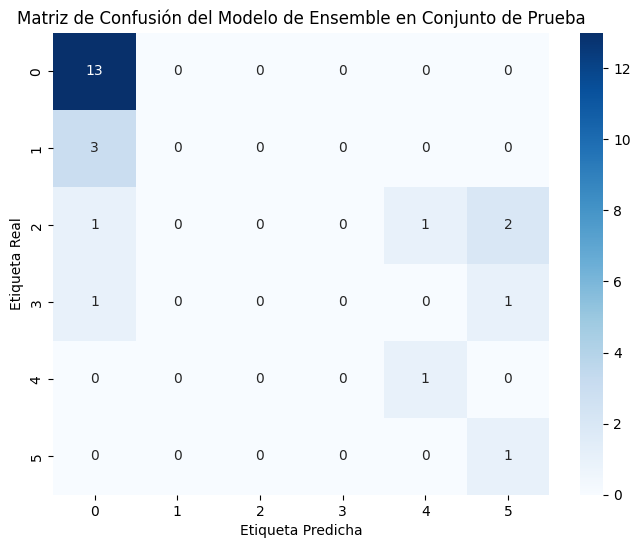

In [87]:
# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_no_linea, y_pred_sub)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(6)], yticklabels=[str(i) for i in range(6)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

*Prueba con la base de datos de test*

Reporte de clasificación para la primera clasificación:
              precision    recall  f1-score   support

           0       0.62      0.79      0.70        19
           1       0.69      0.75      0.72        12
           2       0.67      0.55      0.60        11
           3       0.00      0.00      0.00         4

    accuracy                           0.65        46
   macro avg       0.50      0.52      0.50        46
weighted avg       0.60      0.65      0.62        46


Reporte de clasificación para la subdivisión del grupo 'no linea':
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.50      1.00      0.67         1
           5       0.25      1.00      0.40         1

    accuracy                           0.62        24
   macr

C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

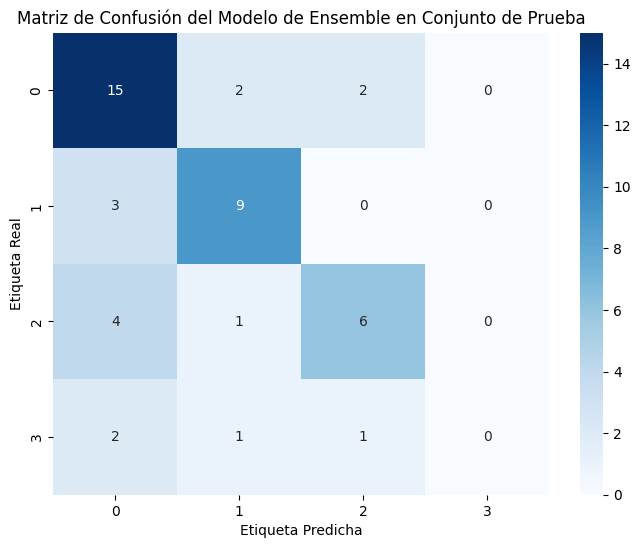

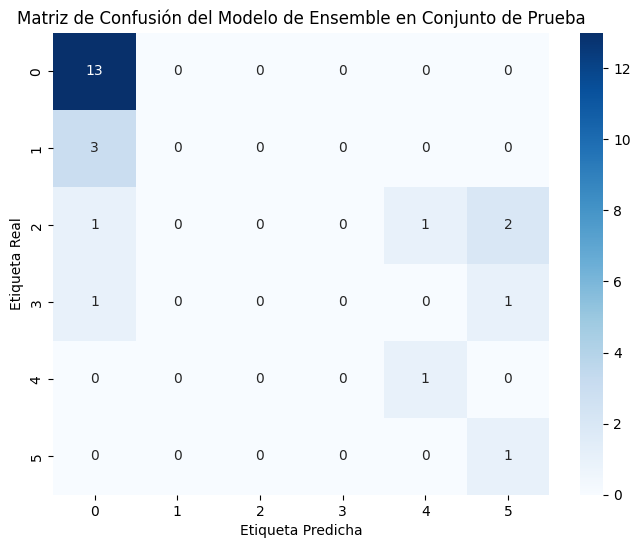

In [88]:
# prueba real

# Cargar datos
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df['textos']  # Frases
y = df['administracion']  # Clases originales

# Vectorización de texto usando TF-IDF
X_tfidf = vectorizer.transform(X_test_main)

# Predicciones y evaluación del primer modelo
y_pred_main = primer_ensemble_model.predict(X_tfidf)
print("Reporte de clasificación para la primera clasificación:")
print(classification_report(y_test_main, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test_main, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show

# Filtrar las muestras clasificadas como 'no linea' en el primer modelo
X_no_linea = X_test_main[y_pred_main == 0]
y_no_linea = y[y_test_main.index[y_pred_main == 0]]  # Usamos la clase original para subdividir

X_no_linea_tfidf = vectorizer2.transform(X_no_linea)

# Predicciones y evaluación del segundo modelo
y_pred_sub = segundo_ensemble_model.predict(X_no_linea_tfidf)
print("\nReporte de clasificación para la subdivisión del grupo 'no linea':")
print(classification_report(y_no_linea, y_pred_sub))


# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_no_linea, y_pred_sub)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(6)], yticklabels=[str(i) for i in range(6)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

## SIMILITUD

## paraphrase-MiniLM-L6-v2

In [14]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

# Inicializar el modelo de embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

segunda_linea = [
    "han recibido tratamiento previo",
    "han tenido terapia antes",
    "han sido tratados previamente",
    "han recibido medicación antes",
    "han tenido tratamiento médico previo",
    'Con tratamiento previo'
    'un tratamiento sistémico previo',
    'han sido previamente tratados',
    'al menos, un tratamiento sistémico',
    'al menos, un tratamiento',
    'han recibido terapia sistémica previa',
    'al menos una terapia previa',
    'han recibido quimioterapia previa',
    'al menos, un régimen de quimioterapia',
    'han recibido al menos un tratamiento previo',
    'al menos un tratamiento previo',
    'segunda línea',
    'cuya enfermedad no haya presentado progresión después de quimiorradioterapia basada en platino',
    'hayan sido tratados previamente'
]

primera_linea = [
    "no han recibido tratamiento previo",
    "no han tenido terapia antes",
    "no han sido tratados previamente",
    "no han recibido medicación antes",
    "no han tenido tratamiento médico previo",
    'sin tratamiento previo',
    'no han recibido quimioterapia previamente',
    'no tratados previamente',
    'en primera remisión tratados',
    'no han sido previamente tratados',
    'primera línea'
]

tercena_linea = [
    'han recibido al menos tres tratamientos previos',
    'después de al menos dos tratamientos previos',
    'al menos tres tratamientos previos',
    'tercera línea'
]


csv_path = r"C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\data\Excel\datos_de_los_medicamentos.csv"
df = pd.read_csv(csv_path , encoding='utf-8-sig')
textos = df['Descripcion_patologia']


# Función para dividir el texto con una ventana deslizante
def dividir_texto(texto, tamaño_ventana):
    palabras = texto.split()
    fragmentos = [' '.join(palabras[i:i+tamaño_ventana]) for i in range(len(palabras) - tamaño_ventana + 1)]
    return fragmentos

# Listas para almacenar los resultados finales
resultados_similitud = []
resultados_linea = []
resultados_frag = []
porcentaje = 0.8

for texto_largo in textos:
    fragmentos = dividir_texto(texto_largo, 5)

    # Calcular representaciones numéricas de las líneas de referencia
    embeddings1 = model.encode(primera_linea)
    embeddings2 = model.encode(segunda_linea)
    embeddings3 = model.encode(tercena_linea)

    similitud = []
    linea = []
    frag = []

    for fragmento in fragmentos:
        embedding_fragmento = model.encode([fragmento])

        # Calcular similitudes con primera_linea
        similarities1 = util.pytorch_cos_sim(embedding_fragmento, embeddings1)
        for idx_i, sentence1 in enumerate(primera_linea):
            similarity_score = similarities1[0][idx_i].item()
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("primera_linea")
                frag.append(fragmento)

        # Calcular similitudes con segunda_linea
        similarities2 = util.pytorch_cos_sim(embedding_fragmento, embeddings2)
        for idx_i, sentence2 in enumerate(segunda_linea):
            similarity_score = similarities2[0][idx_i].item()
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("segunda_linea")
                frag.append(fragmento)

        # Calcular similitudes con tercera_linea
        similarities3 = util.pytorch_cos_sim(embedding_fragmento, embeddings3)
        for idx_i, sentence3 in enumerate(tercena_linea):
            similarity_score = similarities3[0][idx_i].item()
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("tercena_linea")
                frag.append(fragmento)

    # Crear un DataFrame temporal con los resultados del texto actual
    df_temp = pd.DataFrame({
        'similitud': similitud,
        'linea': linea,
        'frag': frag
    })

    # Seleccionar la fila con la similitud más alta para cada tipo de línea
    df_max_similitud_por_linea = df_temp.loc[df_temp.groupby('linea')['similitud'].idxmax()]

    # Guardar los resultados en las listas finales
    resultados_similitud.append(df_max_similitud_por_linea['similitud'].tolist())
    resultados_linea.append(df_max_similitud_por_linea['linea'].tolist())
    resultados_frag.append(df_max_similitud_por_linea['frag'].tolist())

# Crear un DataFrame final con los resultados
df_final = pd.DataFrame({
    'textos': textos,
    'similitud': resultados_similitud,
    'linea': resultados_linea,
    'frag': resultados_frag
})

df_final

C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


,textos,similitud,linea,frag
0,abecma está indicado para el tratamiento de p...,"[0.8109230995178223, 0.9957789182662964]","[segunda_linea, tercena_linea]","[que han recibido al menos, al menos tres trat..."
1,linfoma anaplásico de células grandes sistémi...,"[0.8069086670875549, 1.0]","[primera_linea, segunda_linea]","[sin tratamiento previo. adcetris está, al men..."
2,linfoma de hodgkin adcetris está indicado par...,"[0.9171532988548279, 0.9097827076911926]","[primera_linea, tercena_linea]","[o iv sin tratamiento previo, de al menos dos ..."
3,akeega está indicado con prednisona o prednis...,[],[],[]
4,alecensa en monoterapia está indicado para el...,"[0.9386892318725586, 0.9542174935340881]","[primera_linea, segunda_linea]","[primera línea o - que, han sido previamente t..."
...,...,...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,[0.8324669003486633],[primera_linea],[para el tratamiento de primera]
180,melanoma yervoy en monoterapia está indicado...,[],[],[]
181,mesotelioma pleural maligno (mp yervoy en com...,[0.8324669003486633],[primera_linea],[para el tratamiento de primera]
182,en relación con nivolumab en monoterapia se h...,[0.8324669003486633],[primera_linea],[para el tratamiento de primera]


## BERT

In [15]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity

# Inicializar el modelo de embeddings BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def encode_texts(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).numpy()

segunda_linea = [
    "han recibido tratamiento previo",
    "han tenido terapia antes",
    "han sido tratados previamente",
    "han recibido medicación antes",
    "han tenido tratamiento médico previo",
    'Con tratamiento previo',
    'un tratamiento sistémico previo',
    'han sido previamente tratados',
    'al menos, un tratamiento sistémico',
    'al menos, un tratamiento',
    'han recibido terapia sistémica previa',
    'al menos una terapia previa',
    'han recibido quimioterapia previa',
    'al menos, un régimen de quimioterapia',
    'han recibido al menos un tratamiento previo',
    'al menos un tratamiento previo',
    'segunda línea',
    'cuya enfermedad no haya presentado progresión después de quimiorradioterapia basada en platino',
    'hayan sido tratados previamente',
]

primera_linea = [
    "no han recibido tratamiento previo",
    "no han tenido terapia antes",
    "no han sido tratados previamente",
    "no han recibido medicación antes",
    "no han tenido tratamiento médico previo",
    'sin tratamiento previo',
    'no han recibido quimioterapia previamente',
    'no tratados previamente',
    'en primera remisión tratados',
    'no han sido previamente tratados',
    'primera línea',
]

tercena_linea = [
    'han recibido al menos tres tratamientos previos',
    'después de al menos dos tratamientos previos',
    'al menos tres tratamientos previos',
    'tercera línea',
]

csv_path = r"C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\data\Excel\datos_de_los_medicamentos.csv"
df = pd.read_csv(csv_path, encoding='utf-8-sig')
textos = df['Descripcion_patologia']

# Función para dividir el texto con una ventana deslizante
def dividir_texto(texto, tamaño_ventana):
    palabras = texto.split()
    fragmentos = [' '.join(palabras[i:i+tamaño_ventana]) for i in range(len(palabras) - tamaño_ventana + 1)]
    return fragmentos

# Listas para almacenar los resultados finales
resultados_similitud = []
resultados_linea = []
resultados_frag = []
porcentaje = 0.8

# Calcular representaciones numéricas de las líneas de referencia
embeddings1 = encode_texts(primera_linea)
embeddings2 = encode_texts(segunda_linea)
embeddings3 = encode_texts(tercena_linea)

for texto_largo in textos:
    fragmentos = dividir_texto(texto_largo, 5)

    similitud = []
    linea = []
    frag = []

    for fragmento in fragmentos:
        embedding_fragmento = encode_texts([fragmento])

        # Calcular similitudes con primera_linea
        similarities1 = cosine_similarity(embedding_fragmento, embeddings1)
        for idx_i, sentence1 in enumerate(primera_linea):
            similarity_score = similarities1[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("primera_linea")
                frag.append(fragmento)

        # Calcular similitudes con segunda_linea
        similarities2 = cosine_similarity(embedding_fragmento, embeddings2)
        for idx_i, sentence2 in enumerate(segunda_linea):
            similarity_score = similarities2[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("segunda_linea")
                frag.append(fragmento)

        # Calcular similitudes con tercera_linea
        similarities3 = cosine_similarity(embedding_fragmento, embeddings3)
        for idx_i, sentence3 in enumerate(tercena_linea):
            similarity_score = similarities3[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("tercena_linea")
                frag.append(fragmento)

    # Crear un DataFrame temporal con los resultados del texto actual
    df_temp = pd.DataFrame({
        'similitud': similitud,
        'linea': linea,
        'frag': frag
    })

    # Seleccionar la fila con la similitud más alta para cada tipo de línea
    df_max_similitud_por_linea = df_temp.loc[df_temp.groupby('linea')['similitud'].idxmax()]

    # Guardar los resultados en las listas finales
    resultados_similitud.append(df_max_similitud_por_linea['similitud'].tolist())
    resultados_linea.append(df_max_similitud_por_linea['linea'].tolist())
    resultados_frag.append(df_max_similitud_por_linea['frag'].tolist())

# Crear un DataFrame final con los resultados
df_final = pd.DataFrame({
    'textos': textos,
    'similitud': resultados_similitud,
    'linea': resultados_linea,
    'frag': resultados_frag
})

df_final

,textos,similitud,linea,frag
0,abecma está indicado para el tratamiento de p...,"[0.9125344753265381, 0.8914547562599182, 0.970...","[primera_linea, segunda_linea, tercena_linea]","[y han presentado progresión de, mieloma múlti..."
1,linfoma anaplásico de células grandes sistémi...,"[0.9206043481826782, 0.8923043012619019, 0.929...","[primera_linea, segunda_linea, tercena_linea]","[sin tratamiento previo. adcetris está, al men..."
2,linfoma de hodgkin adcetris está indicado par...,"[0.9152780175209045, 0.9052482843399048, 0.970...","[primera_linea, segunda_linea, tercena_linea]","[o iv sin tratamiento previo, progresión despu..."
3,akeega está indicado con prednisona o prednis...,"[0.8994386792182922, 0.903087854385376, 0.9081...","[primera_linea, segunda_linea, tercena_linea]","[está indicado con prednisona o, o prednisolon..."
4,alecensa en monoterapia está indicado para el...,"[0.9692784547805786, 0.9159824848175049, 0.904...","[primera_linea, segunda_linea, tercena_linea]","[han sido previamente tratados con, alecensa e..."
...,...,...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,"[0.9052026867866516, 0.9218635559082031, 0.903...","[primera_linea, segunda_linea, tercena_linea]","[en platino está indicad o, quimioterapia basa..."
180,melanoma yervoy en monoterapia está indicado...,"[0.9165648818016052, 0.9082990288734436, 0.916...","[primera_linea, segunda_linea, tercena_linea]","[yervoy en monoterapia está indicado, yervoy e..."
181,mesotelioma pleural maligno (mp yervoy en com...,"[0.8979262709617615, 0.8923649787902832, 0.921...","[primera_linea, segunda_linea, tercena_linea]","[con nivolumab está ind icado, combinación con..."
182,en relación con nivolumab en monoterapia se h...,"[0.9124289155006409, 0.8987839221954346, 0.925...","[primera_linea, segunda_linea, tercena_linea]","[con nivolumab está indicado para, combinación..."


## TF-IDF

In [22]:
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')
df

,textos,administracion
0,abecma está indicado para el tratamiento de p...,3
1,linfoma anaplásico de células grandes sistémi...,4
2,linfoma de hodgkin adcetris está indicado par...,4
3,akeega está indicado con prednisona o prednis...,0
4,alecensa en monoterapia está indicado para el...,4
...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,1
180,melanoma yervoy en monoterapia está indicado...,0
181,mesotelioma pleural maligno (mp yervoy en com...,1
182,en relación con nivolumab en monoterapia se h...,1


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer(stop_words='spanish')

segunda_linea = [
    "han recibido tratamiento previo",
    "han tenido terapia antes",
    "han sido tratados previamente",
    "han recibido medicación antes",
    "han tenido tratamiento médico previo",
    'Con tratamiento previo',
    'un tratamiento sistémico previo',
    'han sido previamente tratados',
    'al menos, un tratamiento sistémico',
    'al menos, un tratamiento',
    'han recibido terapia sistémica previa',
    'al menos una terapia previa',
    'han recibido quimioterapia previa',
    'al menos, un régimen de quimioterapia',
    'han recibido al menos un tratamiento previo',
    'al menos un tratamiento previo',
    'segunda línea',
    'cuya enfermedad no haya presentado progresión después de quimiorradioterapia basada en platino',
    'hayan sido tratados previamente',
]

primera_linea = [
    "no han recibido tratamiento previo",
    "no han tenido terapia antes",
    "no han sido tratados previamente",
    "no han recibido medicación antes",
    "no han tenido tratamiento médico previo",
    'sin tratamiento previo',
    'no han recibido quimioterapia previamente',
    'no tratados previamente',
    'en primera remisión tratados',
    'no han sido previamente tratados',
    'primera línea'
]

tercena_linea = [
    'han recibido al menos tres tratamientos previos',
    'después de al menos dos tratamientos previos',
    'al menos tres tratamientos previos',
    'tercera línea',
]

csv_path = r"C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\data\Excel\datos_de_los_medicamentos.csv"
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')
textos = df['textos']

# Función para dividir el texto con una ventana deslizante
def dividir_texto(texto, tamaño_ventana):
    palabras = texto.split()
    fragmentos = [' '.join(palabras[i:i+tamaño_ventana]) for i in range(len(palabras) - tamaño_ventana + 1)]
    return fragmentos

# Listas para almacenar los resultados finales
resultados_similitud = []
resultados_linea = []
resultados_frag = []
porcentaje = 0.8

# Calcular representaciones numéricas de las líneas de referencia
vectorizer.fit(primera_linea + segunda_linea + tercena_linea)
embeddings1 = vectorizer.transform(primera_linea).toarray()
embeddings2 = vectorizer.transform(segunda_linea).toarray()
embeddings3 = vectorizer.transform(tercena_linea).toarray()

for texto_largo in textos:
    fragmentos = dividir_texto(texto_largo, 7)

    similitud = []
    linea = []
    frag = []

    for fragmento in fragmentos:
        embedding_fragmento = vectorizer.transform([fragmento]).toarray()

        # Calcular similitudes con primera_linea
        similarities1 = cosine_similarity(embedding_fragmento, embeddings1)
        for idx_i, sentence1 in enumerate(primera_linea):
            similarity_score = similarities1[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("primera_linea")
                frag.append(fragmento)

        # Calcular similitudes con segunda_linea
        similarities2 = cosine_similarity(embedding_fragmento, embeddings2)
        for idx_i, sentence2 in enumerate(segunda_linea):
            similarity_score = similarities2[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("segunda_linea")
                frag.append(fragmento)

        # Calcular similitudes con tercera_linea
        similarities3 = cosine_similarity(embedding_fragmento, embeddings3)
        for idx_i, sentence3 in enumerate(tercena_linea):
            similarity_score = similarities3[0][idx_i]
            if similarity_score > porcentaje:
                similitud.append(similarity_score)
                linea.append("tercena_linea")
                frag.append(fragmento)

    # Crear un DataFrame temporal con los resultados del texto actual
    #if linea == []:
     #   linea.append('No menciona línea')
        
    df_temp = pd.DataFrame({
        'similitud': similitud,
        'linea': linea,
        'frag': frag
    })

    # Seleccionar la fila con la similitud más alta para cada tipo de línea
    df_max_similitud_por_linea = df_temp.loc[df_temp.groupby('linea')['similitud'].idxmax()]

    # Guardar los resultados en las listas finales
    resultados_similitud.append(df_max_similitud_por_linea['similitud'].tolist())
    resultados_linea.append(df_max_similitud_por_linea['linea'].tolist())
    resultados_frag.append(df_max_similitud_por_linea['frag'].tolist())

# Crear un DataFrame final con los resultados
df_final = pd.DataFrame({
    'textos': textos,
    'frag': resultados_frag,
    'similitud': resultados_similitud,
    'linea': resultados_linea
})

df_final['label_real'] = df['administracion']
df_final


,textos,frag,similitud,linea,label_real
0,abecma está indicado para el tratamiento de p...,"[al menos tres tratamientos previos, incluid os]",[1.0],[tercena_linea],3
1,linfoma anaplásico de células grandes sistémi...,[(lacg sin tratamiento previo. adcetris está i...,"[1.0, 1.0]","[primera_linea, segunda_linea]",4
2,linfoma de hodgkin adcetris está indicado par...,"[estadio iii o iv sin tratamiento previo, trat...","[1.0, 0.8186361422523665, 1.0]","[primera_linea, segunda_linea, tercena_linea]",4
3,akeega está indicado con prednisona o prednis...,[con prednisona o prednisolona para el tratami...,[0.889363658852697],[segunda_linea],0
4,alecensa en monoterapia está indicado para el...,"[o - que han sido previamente tratados, o - qu...","[0.9039272870169355, 1.0]","[primera_linea, segunda_linea]",4
...,...,...,...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,[],[],[],1
180,melanoma yervoy en monoterapia está indicado...,[],[],[],0
181,mesotelioma pleural maligno (mp yervoy en com...,[],[],[],1
182,en relación con nivolumab en monoterapia se h...,[con nivolumab está indicado para el tratamiento],[0.889363658852697],[segunda_linea],1


 ## Tres modelos conjuntos 

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords

# Descargar stopwords en español de nltk
nltk.download('stopwords')

spanish_stopwords = stopwords.words('spanish')

# Inicializar el vectorizador TF-IDF con las stopwords en español
vectorizer0 = TfidfVectorizer(stop_words=spanish_stopwords, ngram_range=(1, 2))


segunda_linea = [
    "han recibido tratamiento previo",
    "han tenido terapia antes",
    "han sido tratados previamente",
    "han recibido medicación antes",
    "han tenido tratamiento médico previo",
    'Con tratamiento previo',
    'un tratamiento sistémico previo',
    'han sido previamente tratados',
    'al menos, un tratamiento sistémico',
    'al menos, un tratamiento',
    'han recibido terapia sistémica previa',
    'al menos una terapia previa',
    'han recibido quimioterapia previa',
    'al menos, un régimen de quimioterapia',
    'han recibido al menos un tratamiento previo',
    'al menos un tratamiento previo',
    'segunda línea',
    'cuya enfermedad no haya presentado progresión después de',
    'hayan sido tratados previamente'
]

primera_linea = [
    "no han recibido tratamiento previo",
    "no han tenido terapia antes",
    "no han sido tratados previamente",
    "no han recibido medicación antes",
    "no han tenido tratamiento médico previo",
    'sin tratamiento previo',
    'no han recibido quimioterapia previamente',
    'no tratados previamente',
    'en primera remisión tratados',
    'no han sido previamente tratados',
    'primera línea'
]

tercena_linea = [
    'han recibido al menos tres tratamientos previos',
    'después de al menos dos tratamientos previos',
    'al menos tres tratamientos previos',
    'tercera línea',
]

csv_path = r"C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\data\Excel\datos_de_los_medicamentos.csv"
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

textos = df['textos']

# Función para dividir el texto con una ventana deslizante
def dividir_texto(texto, tamaño_ventana):
    palabras = texto.split()
    fragmentos = [' '.join(palabras[i:i+tamaño_ventana]) for i in range(len(palabras) - tamaño_ventana + 1)]
    return fragmentos

# Listas para almacenar los resultados finales
resultados_similitud = []
resultados_linea = []
resultados_frag = []
connotaciones_iguales = []

# Calcular representaciones numéricas de las líneas de referencia
vectorizer0.fit(primera_linea + segunda_linea + tercena_linea)
embeddings1 = vectorizer0.transform(primera_linea).toarray()
embeddings2 = vectorizer0.transform(segunda_linea).toarray()
embeddings3 = vectorizer0.transform(tercena_linea).toarray()

porcentaje = []
window = [4, 5, 6, 7]

for texto_largo in textos:
    for h in window:
        porcentaje = (h-1)/h
        fragmentos = dividir_texto(texto_largo, h)
    
        similitud = []
        linea = []
        frag = []
    
        for fragmento in fragmentos:
            embedding_fragmento = vectorizer0.transform([fragmento]).toarray()
    
            # Calcular similitudes con primera_linea
            similarities1 = cosine_similarity(embedding_fragmento, embeddings1)
            for idx_i, sentence1 in enumerate(primera_linea):
                similarity_score = similarities1[0][idx_i]
                if similarity_score > porcentaje:
                    similitud.append(similarity_score)
                    linea.append("primera_linea")
                    frag.append(fragmento)
    
            # Calcular similitudes con segunda_linea
            similarities2 = cosine_similarity(embedding_fragmento, embeddings2)
            for idx_i, sentence2 in enumerate(segunda_linea):
                similarity_score = similarities2[0][idx_i]
                if similarity_score > porcentaje:
                    similitud.append(similarity_score)
                    linea.append("segunda_linea")
                    frag.append(fragmento)
    
            # Calcular similitudes con tercera_linea
            similarities3 = cosine_similarity(embedding_fragmento, embeddings3)
            for idx_i, sentence3 in enumerate(tercena_linea):
                similarity_score = similarities3[0][idx_i]
                if similarity_score > porcentaje:
                    similitud.append(similarity_score)
                    linea.append("tercena_linea")
                    frag.append(fragmento)
    
    # Crear un DataFrame temporal con los resultados del texto actual
    df_temp = pd.DataFrame({
        'similitud': similitud,
        'linea': linea,
        'frag': frag
    })

    # Seleccionar la fila con la similitud más alta para cada tipo de línea
    df_max_similitud_por_linea = df_temp.loc[df_temp.groupby('linea')['similitud'].idxmax()]

    # Guardar los resultados en las listas finales
    resultados_similitud.append(df_max_similitud_por_linea['similitud'].tolist())
    resultados_linea.append(df_max_similitud_por_linea['linea'].tolist())
    resultados_frag.append(df_max_similitud_por_linea['frag'].tolist())

# Crear un DataFrame final con los resultados
df_final = pd.DataFrame({
    'textos': textos,
    'frag': resultados_frag,
    'similitud': resultados_similitud,
    'linea': resultados_linea
})

df_final['label_real'] = df['administracion']
df_final

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lazkuenaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,textos,frag,similitud,linea,label_real
0,abecma está indicado para el tratamiento de p...,[han recibido al menos tres tratamientos previ...,[1.0],[tercena_linea],3
1,linfoma anaplásico de células grandes sistémi...,[(lacg sin tratamiento previo. adcetris está i...,"[1.0000000000000002, 1.0000000000000002]","[primera_linea, segunda_linea]",4
2,linfoma de hodgkin adcetris está indicado par...,"[estadio iii o iv sin tratamiento previo, esta...","[1.0000000000000002, 1.0000000000000002, 1.0]","[primera_linea, segunda_linea, tercena_linea]",4
3,akeega está indicado con prednisona o prednis...,[],[],[],0
4,alecensa en monoterapia está indicado para el...,"[o - que han sido previamente tratados, o - qu...","[1.0, 1.0]","[primera_linea, segunda_linea]",4
...,...,...,...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,[de primera línea del cáncer de pulmón],[0.9999999999999999],[primera_linea],1
180,melanoma yervoy en monoterapia está indicado...,[],[],[],0
181,mesotelioma pleural maligno (mp yervoy en com...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1
182,en relación con nivolumab en monoterapia se h...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1


In [20]:
import joblib

# Guardar vectorizador y listas de referencia
vectorizer_path = r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\modelos\vectorizer0_similitud.joblib'
listas_referencia = {
    "primera_linea": primera_linea,
    "segunda_linea": segunda_linea,
    "tercena_linea": tercena_linea
}

joblib.dump((vectorizer0, listas_referencia), vectorizer_path)


['C:\\Users\\lazkuenaru\\Desktop\\TFM\\pharmaceutical_extraction\\src\\Model\\modelos\\vectorizer0_similitud.joblib']

In [21]:
df_final['label_pred'] = None
for i, lin in enumerate(df_final['linea']):
    
    if lin == ['tercena_linea']:
        df_final['label_pred'][i] = 3
        
    elif lin == ['primera_linea', 'segunda_linea']:
        df_final['label_pred'][i] = 4
        
    elif lin == ['primera_linea']:
        df_final['label_pred'][i] = 1
        
    elif lin == ['segunda_linea']:
        df_final['label_pred'][i] = 2
        
    elif lin == ['segunda_linea','tercena_linea']:
        df_final['label_pred'][i] = 5
        
    elif lin == ['primera_linea','tercena_linea']:
         df_final['label_pred'][i] = 6
    else:
        df_final['label_pred'][i] = 0

C:\Users\lazkuenaru\AppData\Local\Temp\ipykernel_15756\2329082538.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_final['label_pred'][i] = 3
C:\Users\lazkuenaru\AppData\Local\Temp\ipykernel_15756\2329082538.py:5: SettingWithCopyWarnin

In [22]:
df_final.to_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\resultados_similitud.csv', index=False, encoding='utf-8-sig', sep=';')

In [23]:
df_final

,textos,frag,similitud,linea,label_real,label_pred
0,abecma está indicado para el tratamiento de p...,[han recibido al menos tres tratamientos previ...,[1.0],[tercena_linea],3,3
1,linfoma anaplásico de células grandes sistémi...,[(lacg sin tratamiento previo. adcetris está i...,"[1.0000000000000002, 1.0000000000000002]","[primera_linea, segunda_linea]",4,4
2,linfoma de hodgkin adcetris está indicado par...,"[estadio iii o iv sin tratamiento previo, esta...","[1.0000000000000002, 1.0000000000000002, 1.0]","[primera_linea, segunda_linea, tercena_linea]",4,0
3,akeega está indicado con prednisona o prednis...,[],[],[],0,0
4,alecensa en monoterapia está indicado para el...,"[o - que han sido previamente tratados, o - qu...","[1.0, 1.0]","[primera_linea, segunda_linea]",4,4
...,...,...,...,...,...,...
179,cáncer de pulmón no microcítico (cpn yervoy e...,[de primera línea del cáncer de pulmón],[0.9999999999999999],[primera_linea],1,1
180,melanoma yervoy en monoterapia está indicado...,[],[],[],0,0
181,mesotelioma pleural maligno (mp yervoy en com...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1,1
182,en relación con nivolumab en monoterapia se h...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1,1


In [24]:
# DataFrame con todas las filas donde label_pred es 0
df_label_0 = df_final[df_final['label_pred'] == 0]

# DataFrame con todas las filas donde label_pred es diferente de 0
df_label_non_0 = df_final[df_final['label_pred'] != 0]

In [25]:
df_label_non_0

,textos,frag,similitud,linea,label_real,label_pred
0,abecma está indicado para el tratamiento de p...,[han recibido al menos tres tratamientos previ...,[1.0],[tercena_linea],3,3
1,linfoma anaplásico de células grandes sistémi...,[(lacg sin tratamiento previo. adcetris está i...,"[1.0000000000000002, 1.0000000000000002]","[primera_linea, segunda_linea]",4,4
4,alecensa en monoterapia está indicado para el...,"[o - que han sido previamente tratados, o - qu...","[1.0, 1.0]","[primera_linea, segunda_linea]",4,4
6,cáncer de pulmón no microcítico alimta en com...,[en primera línea de pacientes con cáncer],[0.9999999999999999],[primera_linea],1,1
7,mesotelioma pleural maligno alimta en combina...,[resecable que no han recibido quimioterapia p...,[1.0000000000000002],[primera_linea],1,1
...,...,...,...,...,...,...
177,carcinoma de células escamosas de esófago (cc...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1,1
179,cáncer de pulmón no microcítico (cpn yervoy e...,[de primera línea del cáncer de pulmón],[0.9999999999999999],[primera_linea],1,1
181,mesotelioma pleural maligno (mp yervoy en com...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1,1
182,en relación con nivolumab en monoterapia se h...,[de primera línea de pacientes adultos con],[0.9999999999999999],[primera_linea],1,1


In [26]:
df_label_0 = df_label_0[['textos','label_real']]
df_label_0.reset_index()
df_label_0

,textos,label_real
2,linfoma de hodgkin adcetris está indicado par...,4
3,akeega está indicado con prednisona o prednis...,0
5,alimta en monoterapia está indicado como trat...,2
8,mastocitosis sistémica avanzada (msa ayvakyt ...,2
9,tumor del estroma gastrointestinal (teg irres...,0
...,...,...
173,xospata está indicadoen monoterapia para el t...,5
174,xtandi está indicado para: tratamiento de h...,2
175,xtandi está indicado para: tratamiento de h...,0
178,cáncer colorrectal (cr con deficiencia del si...,2


In [42]:
import joblib

# Guardar modelo 1 y su vectorizador
joblib.dump(primer_ensemble_model, r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\modelos\modelo_1.joblib')
joblib.dump(vectorizer1, r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\modelos\vectorizer_modelo_1.joblib')
print("Modelo 1 y su vectorizador guardados como 'modelo_1.joblib' y 'vectorizer_modelo_1.joblib'.")


# Guardar modelo 2 y su vectorizador
joblib.dump(segundo_ensemble_model, r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\modelos\modelo_2.joblib')
joblib.dump(vectorizer2, r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\modelos\vectorizer_modelo_2.joblib')
print("Modelo 2 y su vectorizador guardados como 'modelo_2.joblib' y 'vectorizer_modelo_2.joblib'.")

Modelo 1 y su vectorizador guardados como 'modelo_1.joblib' y 'vectorizer_modelo_1.joblib'.
Modelo 2 y su vectorizador guardados como 'modelo_2.joblib' y 'vectorizer_modelo_2.joblib'.


Reporte de clasificación para la primera clasificación (conjunto filtrado de 0, 4 y 5):
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        33
           4       0.80      0.40      0.53        10
           5       0.00      0.00      0.00        12

    accuracy                           0.65        55
   macro avg       0.48      0.46      0.44        55
weighted avg       0.54      0.65      0.57        55



C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


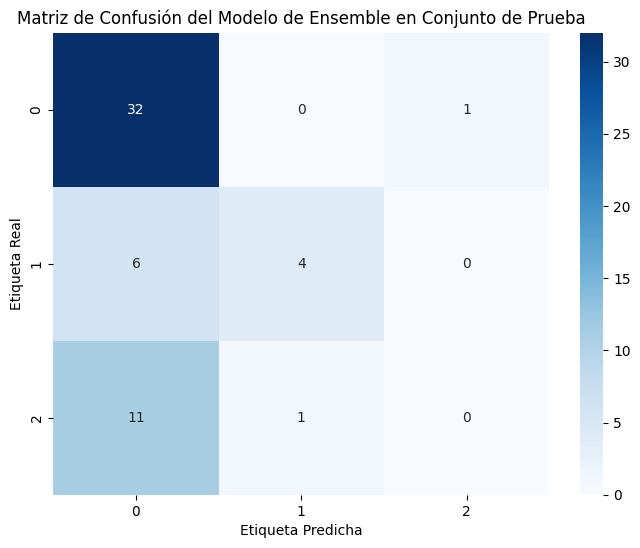

C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Reporte de clasificación para la primera clasificación:
              precision    recall  f1-score   support

           0       0.53      0.78      0.63        55
           1       0.69      0.65      0.67        34
           2       0.43      0.21      0.28        29
           3       1.00      0.18      0.31        11

    accuracy                           0.57       129
   macro avg       0.66      0.45      0.47       129
weighted avg       0.59      0.57      0.53       129



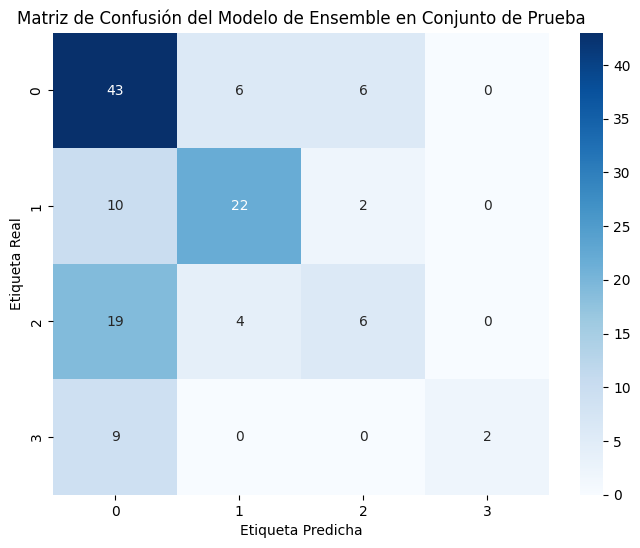

In [41]:
## Model 2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

# Filtrar solo los datos con clases 0, 4, y 5
df_filtered = df[df['administracion'].isin([0, 4, 5])]

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df_filtered['textos']  # Frases
y = df_filtered['administracion']  # Clases originales

# Dividir los datos en conjuntos de entrenamiento y prueba para la primera clasificación
random = 81418
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X, y, test_size=0.7, random_state=random)

# Vectorización de texto usando TF-IDF
vectorizer2 = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer2.fit_transform(X_train_main)
X_test_tfidf = vectorizer2.transform(X_test_main)

# Crear el modelo de ensemble
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=10, random_state=81418)
rf = RandomForestClassifier(n_estimators=150, random_state=81418)
ada = AdaBoostClassifier(random_state=81418)
et = ExtraTreesClassifier(n_estimators=150, random_state=81418)
lr = LogisticRegression(random_state=81418, max_iter=200)

segundo_ensemble_model = VotingClassifier(
    estimators=[
         ('rf', rf),
        ('gb', gb),
        ('et', et),
        ('lr', lr),
        ('ada', ada)
    ],
    voting='soft'
)

# Entrenar el modelo en el conjunto filtrado de entrenamiento
segundo_ensemble_model.fit(X_train_tfidf, y_train_main)

# Predicciones y evaluación del primer modelo
y_pred_main = segundo_ensemble_model.predict(X_test_tfidf)
print("Reporte de clasificación para la primera clasificación (conjunto filtrado de 0, 4 y 5):")
print(classification_report(y_test_main, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test_main, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(3)], yticklabels=[str(i) for i in range(3)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()



## Model 1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Cargar datos
df = pd.read_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\textos_patologias_linea_de_administracion.csv', 
                 encoding='utf-8-sig', delimiter=';')

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df['textos']  # Frases
y = df['administracion']  # Clases originales

# Convertir clases 4 y 5 a 'no linea'
y_main = y.replace({4: 0, 5: 0})  # Cambiar las clases 4 y 5 a 0 ('no linea')

# Dividir los datos en conjuntos de entrenamiento y prueba para la primera clasificación
random = 81418
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X, y_main, test_size=0.7, random_state=random, stratify=y_main)

# Vectorización de texto usando TF-IDF
vectorizer1 = TfidfVectorizer(max_features=5000)  # Puedes ajustar max_features según sea necesario
X_train_tfidf = vectorizer1.fit_transform(X_train_main)
X_test_tfidf = vectorizer1.transform(X_test_main)

# Crear los clasificadores
gb = GradientBoostingClassifier(learning_rate=0.05, max_depth=10, random_state=81418)
rf = RandomForestClassifier(n_estimators=150, random_state=81418)
ada = AdaBoostClassifier(random_state=81418)
et = ExtraTreesClassifier(n_estimators=150, random_state=81418)
lr = LogisticRegression(random_state=81418, max_iter=200)

primer_ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('et', et),
        ('lr', lr),
        ('ada', ada)
    ],
    voting='soft'  # 'soft' utiliza las probabilidades, 'hard' usa la mayoría de votos
)

primer_ensemble_model.fit(X_train_tfidf, y_train_main)

# Predicciones y evaluación del primer modelo
y_pred_main = primer_ensemble_model.predict(X_test_tfidf)
print("Reporte de clasificación para la primera clasificación:")
print(classification_report(y_test_main, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test_main, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()


Reporte de clasificación para la primera clasificación:
              precision    recall  f1-score   support

           0       0.47      0.17      0.25        46
           1       0.03      0.33      0.06         3
           2       0.30      0.70      0.42        20
           3       1.00      0.10      0.18        10
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        12

    accuracy                           0.26        93
   macro avg       0.30      0.22      0.15        93
weighted avg       0.41      0.26      0.24        93


Reporte de clasificación para la subdivisión del grupo 'no linea':
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
        

C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lazkuenaru\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

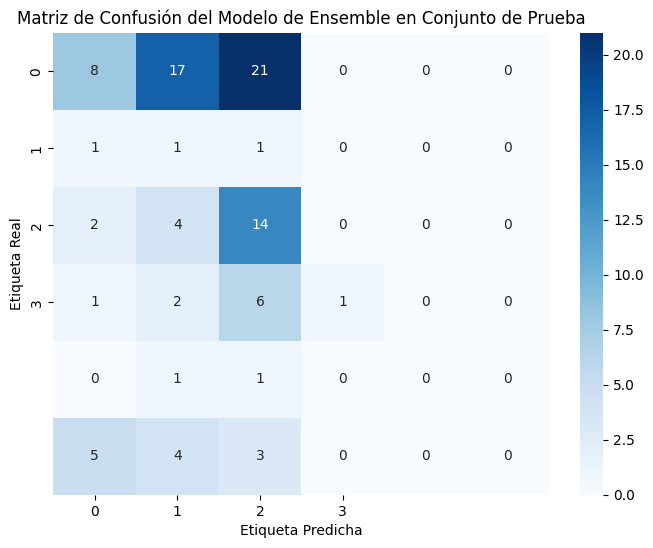

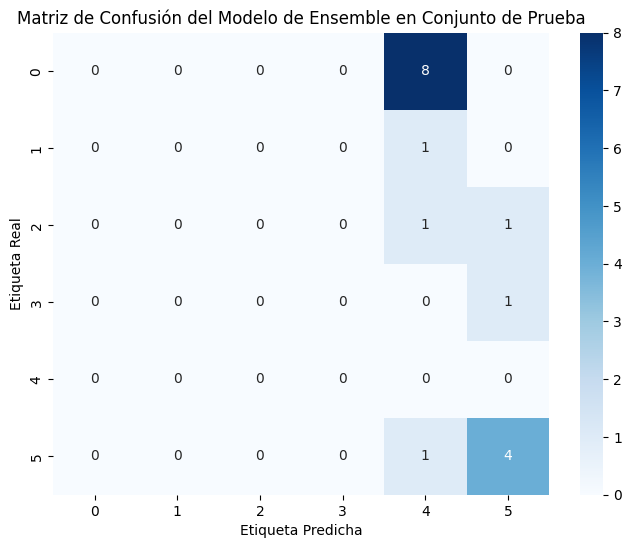

In [29]:
# prueba real

# Cargar datos
df = df_label_0
df['label_pred'] = None

# Asumimos que 'textos' es la columna de frases y 'administracion' es la columna de clase
X = df['textos']  # Frases
y = df['label_real']  # Clases originales

# Vectorización de texto usando TF-IDF
X_tfidf = vectorizer1.transform(X)

# Predicciones y evaluación del primer modelo
y_pred_main = primer_ensemble_model.predict(X_tfidf)
print("Reporte de clasificación para la primera clasificación:")
print(classification_report(y, y_pred_main))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y, y_pred_main)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(4)], yticklabels=[str(i) for i in range(4)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show

# Filtrar X_test_main y y_test_main en función de las predicciones del modelo principal (donde y_pred_main == 0)
X_no_linea = X[y_pred_main == 0]
# Asegurarse de obtener los valores de y_test_main en lugar de usar índices de y
y_no_linea = y[y_pred_main == 0]

y_pred_sub_no_0 = y[y_pred_main != 0]
df.loc[df['label_pred'].isna(), 'label_pred'] = y_pred_sub_no_0

X_no_linea_tfidf = vectorizer2.transform(X_no_linea)

# Predicciones y evaluación del segundo modelo
y_pred_sub = segundo_ensemble_model.predict(X_no_linea_tfidf)
print("\nReporte de clasificación para la subdivisión del grupo 'no linea':")
print(classification_report(y_no_linea, y_pred_sub))

# Matriz de Confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_no_linea, y_pred_sub)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in range(6)], yticklabels=[str(i) for i in range(6)])
plt.title("Matriz de Confusión del Modelo de Ensemble en Conjunto de Prueba")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

df.loc[df['label_pred'].isna(), 'label_pred'] = pd.Series(y_pred_sub, index=X_no_linea.index)

In [30]:
df

,textos,label_real,label_pred
2,linfoma de hodgkin adcetris está indicado par...,4,4.0
3,akeega está indicado con prednisona o prednis...,0,0.0
5,alimta en monoterapia está indicado como trat...,2,2.0
8,mastocitosis sistémica avanzada (msa ayvakyt ...,2,2.0
9,tumor del estroma gastrointestinal (teg irres...,0,0.0
...,...,...,...
173,xospata está indicadoen monoterapia para el t...,5,5.0
174,xtandi está indicado para: tratamiento de h...,2,2.0
175,xtandi está indicado para: tratamiento de h...,0,4
178,cáncer colorrectal (cr con deficiencia del si...,2,2.0


In [31]:
df_combined = pd.merge(df, df_label_non_0, how='outer')
df_combined

,textos,label_real,label_pred,frag,similitud,linea
0,\r\ncáncer de mama lynparza está indicado com...,2,4,"[tratamiento previo con una antraciclina y un,...","[1.0000000000000002, 1.0000000000000002]","[primera_linea, segunda_linea]"
1,\r\ncáncer de pulmón microcítico (cp tecentri...,1,1,[de primera línea de cáncer de pulmón],[0.9999999999999999],[primera_linea]
2,\r\ntrastornos que responden al tratamiento c...,0,4,NaN,NaN,NaN
3,este medicamento es únicamente para uso diag...,2,2.0,NaN,NaN,NaN
4,imjudo en combinación con durvalumab y quimi...,1,1,[de primera línea de adultos con cáncer],[0.9999999999999999],[primera_linea]
...,...,...,...,...,...,...
179,xospata está indicadoen monoterapia para el t...,5,5.0,NaN,NaN,NaN
180,xtandi está indicado para: tratamiento de h...,2,2.0,NaN,NaN,NaN
181,xtandi está indicado para: tratamiento de h...,0,4,[metastásico (cphs en combinación con la terap...,"[1.0, 1.0]","[primera_linea, segunda_linea]"
182,xtandi está indicado para: tratamiento de h...,0,4,NaN,NaN,NaN


In [32]:
df_combined.to_csv(r'C:\Users\lazkuenaru\Desktop\TFM\pharmaceutical_extraction\src\Model\resultados_similitud.csv', index=False, encoding='utf-8-sig', sep=';')

In [33]:
# Convertir a enteros (si es necesario)
df_combined['label_real'] = df_combined['label_real'].astype(int, errors='ignore')
df_combined['label_pred'] = df_combined['label_pred'].astype(int, errors='ignore')

# Si hay NaN o valores inválidos en 'label_pred', reemplazarlos por un valor de clase predeterminado (ejemplo: -1)
df_combined['label_pred'] = df_combined['label_pred'].fillna(-1).astype(int)

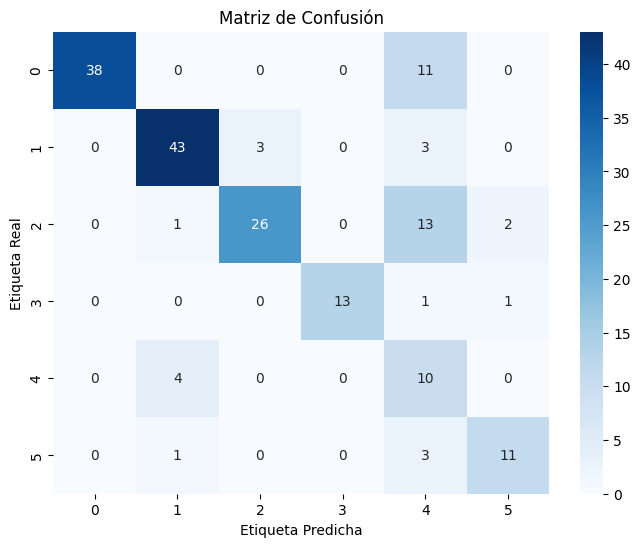

Precisión (Accuracy): 0.7663043478260869

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.78      0.87        49
           1       0.88      0.88      0.88        49
           2       0.90      0.62      0.73        42
           3       1.00      0.87      0.93        15
           4       0.24      0.71      0.36        14
           5       0.79      0.73      0.76        15

    accuracy                           0.77       184
   macro avg       0.80      0.76      0.76       184
weighted avg       0.87      0.77      0.80       184



In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusión
conf_matrix = confusion_matrix(df_combined['label_real'], df_combined['label_pred'])

# Precisión (Accuracy)
accuracy = accuracy_score(df_combined['label_real'], df_combined['label_pred'])

# Reporte completo de clasificación
report = classification_report(df_combined['label_real'], df_combined['label_pred'])

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[str(i) for i in sorted(df_combined['label_pred'].unique())], 
            yticklabels=[str(i) for i in sorted(df_combined['label_real'].unique())])
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.show()

# Imprimir precisión y reporte
print("Precisión (Accuracy):", accuracy)
print("\nReporte de clasificación:")
print(report)